In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

from utils import load_and_split_data

In [63]:
# add custom stopwords
STOPWORDS.add("feel")
STOPWORDS.add("feeling")
STOPWORDS.add("im")
STOPWORDS.add("i")
STOPWORDS.add("ive")

In [64]:
train_data, validation_data, test_data = load_and_split_data()

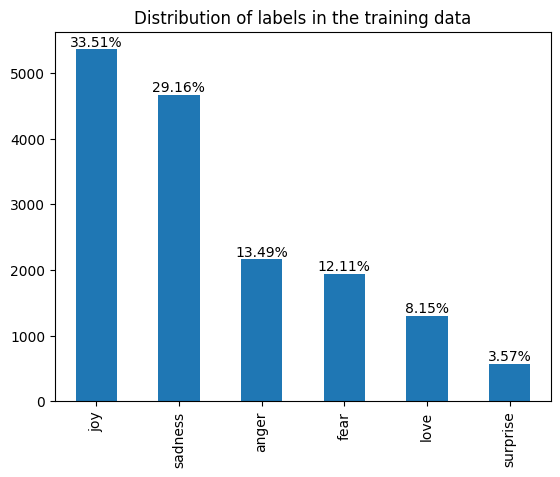

In [65]:
labels_dict = {
    0: "sadness",
    1: "joy",
    2: "love",
    3: "anger",
    4: "fear",
    5: "surprise"
}
labels_count = pd.Series(train_data["label"]).value_counts()
labels_count = labels_count.rename(index=labels_dict)
labels_count.plot(kind="bar")
for i, value in enumerate(labels_count):
    plt.text(i, value + 50, f"{value / len(train_data) * 100:.2f}%", ha="center")
plt.title("Distribution of labels in the training data")
plt.show()

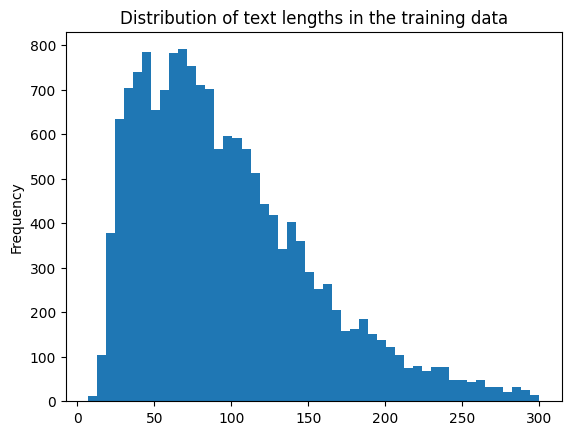

In [66]:
text_lengths = pd.Series(train_data["text"]).apply(len)
text_lengths.plot(kind="hist", bins=50)
plt.title("Distribution of text lengths in the training data")
plt.show()

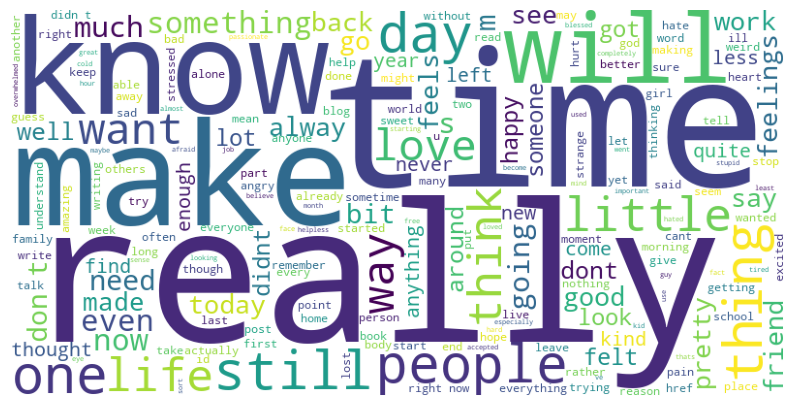

In [67]:
wc = WordCloud(
    max_words=200,
    background_color="white",
    stopwords=STOPWORDS,
    width=800,
    height=400,
)
text = " ".join(train_data["text"])
fig = plt.figure(figsize=(10, 10))
wc.generate(text)
plt.imshow(wc)
plt.axis("off")
plt.show()

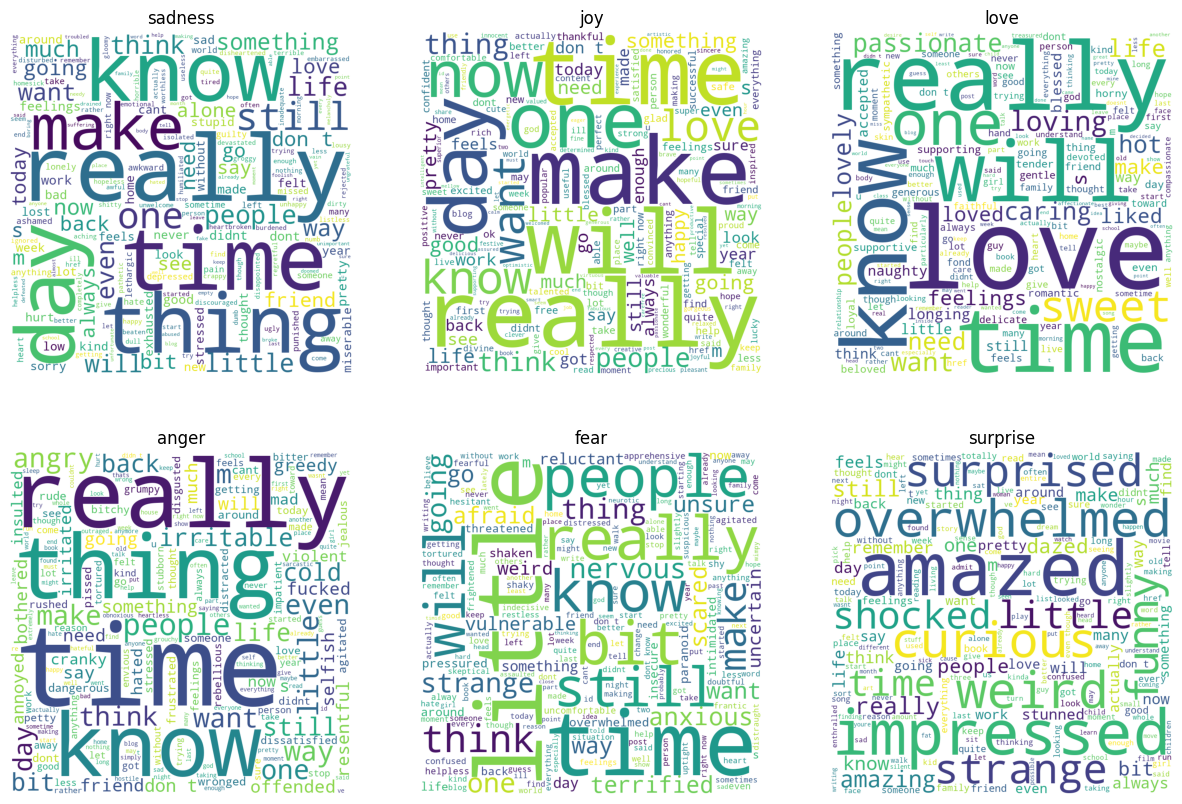

In [68]:
train_df = train_data.to_pandas()
# generate wordcloud for each label
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
wc = WordCloud(
    max_words=200,
    background_color="white",
    stopwords=STOPWORDS,
    width=800,
    height=800,
)
for i, ax in enumerate(axes.flatten()):
    label = labels_dict[i]
    text = " ".join(train_df[train_df["label"] == i]["text"])
    wc.generate(text)
    ax.imshow(wc)
    ax.set_title(label)
    ax.axis("off")